# Assessment Problems

In [3]:
#Import the different modules needed
import math
import random
import itertools
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats



## Extending the Lady Tasting Tea

In [26]:
#Number of cups of tea in total 
no_cups = 12

#Number of cups of tea with milk first
no_cups_milk_first = 4

#Number of cups of tea after

no_cups_tea_first = 8



In [50]:
# Number of ways to choose which cups are milk-first (combinations: order doesn't matter)  
# more info about math.comb https://docs.python.org/3/library/math.html#math.comb

# Calculate the number of ways to choose milk-first cups from all cups
ways = math.comb(no_cups, no_cups_milk_first)

#Show
ways

495

In [ ]:
# Adding labels for the cups 

labels = list(range(no_cups))

labels

In [ ]:
#Show the different ways of selecting No_cupos_milk_+first out of no_cups of tea
#https://docs.python.org/3/library/itertools.html#itertools.combinations
combs = list(itertools.combinations(labels, no_cups_milk_first))

#Show
combs


In [51]:
# Randomly select 4 cups to be milk-first (shuffling the 12 cups)

labels_milk = random.sample(labels,4)

#Sort the selected labels to improve readability 
labels_milk.sort()

labels_milk

[0, 1, 2, 3]

In [52]:
# Turn labels_milk into a set
set(labels_milk)

{0, 1, 2, 3}

In [ ]:
# List to store number of overlaps for each combination
no_overlaps = []

# Loop through all possible combinations of milk-first cups
for comb in combs:
    # Convert combination to set
    s1 = set(comb)
    # Convert actual milk-first cups to set
    s2 = set(labels_milk)
    # Find overlap (correctly guessed cups)
    overlap = s1.intersection(s2)
    # Show combination, overlap, and number of correct guesses
    print(comb, len(overlap), overlap)
    # Append number of correct guesses to list
    no_overlaps.append(len(overlap))



In [54]:
#Count the number of times each overlap occurs
counts = np.unique(no_overlaps, return_counts= True)

counts

(array([0, 1, 2, 3, 4]), array([ 70, 224, 168,  32,   1], dtype=int64))

<BarContainer object of 5 artists>

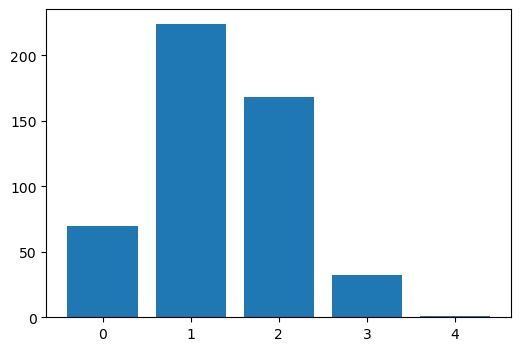

In [55]:
#Create figure

fig,ax = plt.subplots(figsize=(6,4))

ax.bar(counts[0], counts[1])

#### Probabilities



##### The probabilities can be calculated as per below. The table is added for readability

In [ ]:
# Code to calculates robabilities for 12-cup experiment
prob_12 = [70/495, 224/495, 168/495, 32/495, 1/495]

# Code to calculate robabilities for 8-cup experiment
prob_8 = [1/70, 16/70, 36/70, 16/70, 1/70]

# Print comparison
for r in range(5):
    print(f"{r} correct cups:", prob_12[r], "vs", prob_8[r])



##### Table for readability 

| Correct Cups | 12-Cup Probability | 8-Cup Probability |
|--------------|------------------|-----------------|
| 0            | 70/495 ≈ 0.1414  | 1/70 ≈ 0.0143  |
| 1            | 224/495 ≈ 0.4525 | 16/70 ≈ 0.2286 |
| 2            | 168/495 ≈ 0.3394 | 36/70 ≈ 0.5143 |
| 3            | 32/495 ≈ 0.0646  | 16/70 ≈ 0.2286 |
| 4            | 1/495 ≈ 0.0020   | 1/70 ≈ 0.0143  |


#### Results and interpretation

1. **The probability of correctly selecting all 4 cups with milk poured first is very low and decreases rapidly as the total number of cups increases.**  
   - For example, with 16 cups (1820 possible combinations), the probability decreases to 0.00055.
2. **As the total number of cups increases, the most likely number of correct selections shifts downward.**  
   - For instance, increasing from 8 to 12 cups, the most likely number of correct selections decreases from 2 to 1.  
   - When the total number of cups reaches 23 or more, the most probable outcome is selecting 0 cups correctly.
3. **Conclusion**
    -   The probability of selecting all 4 cups correctly in a large experiment is extremely low, suggesting that the lady is not guessing.

---

## Normal Distribution 

In [ ]:
#np.random.normal is used to generate random samples from a normal distribution. 
#Loc = Mean (center) of the distribution.
#Scale: Standard deviation (spread).
#size: Shape of the output (single value, 1D array, 2D array, etc.).
#More info about np.random.normal can be found at  https://www.geeksforgeeks.org/numpy/normal-distribution-in-numpy/
samples = np.random.normal(loc=0, scale=1, size=(100000, 10))



In [35]:

# Standard deviations
#https://numpy.org/doc/stable/reference/generated/numpy.std.html
#https://www.geeksforgeeks.org/python/numpy-std-in-python/
# info about DDof https://tidystat.com/when-to-use-ddof1-in-np-std/
sd_ddof1 = np.std(samples, axis=1, ddof=1)  
sd_ddof0 = np.std(samples, axis=1, ddof=0)  

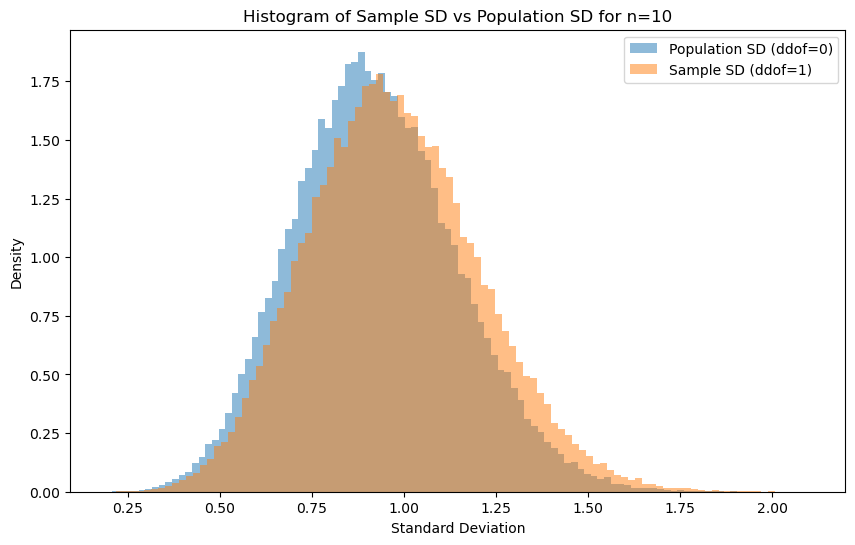

In [36]:


# Plot histograms
plt.figure(figsize=(10, 6))
plt.hist(sd_ddof0, bins=100, alpha=0.5, label='Population SD (ddof=0)', density=True)
plt.hist(sd_ddof1, bins=100, alpha=0.5, label='Sample SD (ddof=1)', density=True)
plt.xlabel('Standard Deviation')
plt.ylabel('Density')
plt.title('Histogram of Sample SD vs Population SD for n=10')
plt.legend()
plt.show()


### Observations


1) We can see that the histograms have very similar shapes, and as the sample size increases, both distributions become more tightly concentrated around 1. It tends to 1 because the samples come from a standard normal distribution, whose true population standard deviation is exactly 1. ([Normal distribution](https://en.wikipedia.org/wiki/Normal_distribution))
2) It is noticeable that the two histograms don’t match exactly—they are slightly shifted. This difference is at the core of the exercise. 
    -   Population SD (ddof=0) divides by N and describes the data itself.
    -   Sample SD (ddof=1) divides by N−1 to correct for bias when estimating the population variance ([Bessel’s correction](https://en.wikipedia.org/wiki/Bessel%27s_correction)).
Because the sample SD corrects for the fact that the sample mean underestimates variability, it is slightly larger than the population SD. This explains why the histograms are not in the exact same position.


---

# t-Tests

##### imformation about ttest https://www.geeksforgeeks.org/data-science/t-test/

In [ ]:
# Paramaters
# Simulation of 1000 runs
n_similation = 1000
#SAmple size per group
sample_size = 100
# create the list of means for d in the simulation. 0 start the sequence, 1 end the sequence, 11 is the number of points to generate including both ends.
ds = np.linspace(0, 1, 11)
significance_level = 0.05




In [76]:
# to build the data we need to store the type II error rates for each difference in means (d).

type_II_errors = []



In [ ]:
#This foor loop will itinerate all the ds values. 
#For each d, it simulate experiments to test how the Type II error changes with different mean differences.
for d in ds:
    # Generate random samples from a normal distribution. 
    # Each row represents one of 1,000 independent experiments, each with 100 samples.
    # See https://www.datacamp.com/doc/numpy/random-normal for more details on np.random.normal and 2D arrays.
    group_a = np.random.normal(0, 1, (n_similation, sample_size))
    group_b = np.random.normal(d, 1, (n_similation, sample_size))
    
    # Adding axis =1 we ensure that t-test compares samples in each row
    _, p_vals = stats.ttest_ind(group_a, group_b,  axis=1)
    
    # np.mean calculates the proportion of tests where the p-value exceeds the significance level.
    # This proportion estimates the Type II error rate.
    type_II_errors.append(np.mean(p_vals > significance_level ))


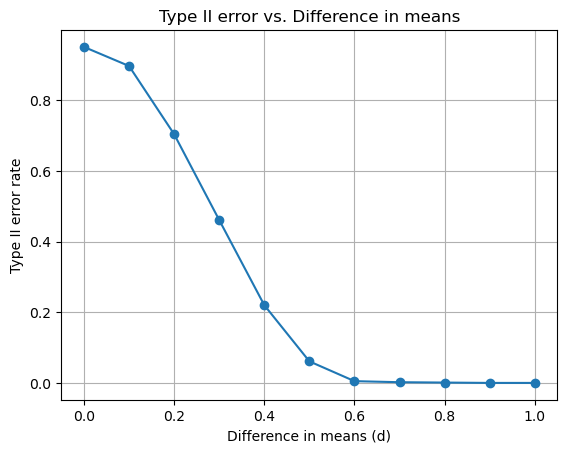

In [79]:

# Plot
plt.plot(ds, type_II_errors, marker='o')
plt.xlabel("Difference in means (d)")
plt.ylabel("Type II error rate")
plt.title("Type II error vs. Difference in means")
plt.grid(True)
plt.show()




### Explanations and trend analysis

A type II error, or a false negative, is the incorrect failure to reject a false null hypothesis. (https://en.wikipedia.org/wiki/Type_I_and_type_II_errors).

Based on all the data presented in the excersise we can extract interesting information.

1)  When d = 0 there is no true difference between the two groups, so the test does not reject the null hypothesis. About 95% of the time we fail to reject the null, which matches the significance level of 0.05.

2)  As d increases, the difference between the groups becomes larger. This makes it easier for the test to detect a difference. As a consequence, the Type II error decreases, as we can see in the graph.

3)  When d is large ( d=1), the test almost always finds a significant difference. As shown in the graph, the Type II error approaches zero.

---

# Anova

In [ ]:
#https://www.geeksforgeeks.org/data-science/difference-between-t-test-and-anova/